## Day 27 Lecture 2 Assignment

In this assignment, we will learn about interpreting linear models. We will use the google play store dataset loaded below and analyze the regression from this dataset.

In [286]:
# %matplotlib inline

# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from sklearn import linear_model
# from sklearn.model_selection import train_test_split
# import statsmodels.api as sm
# import numpy as np
# from sklearn.preprocessing import QuantileTransformer
# import seaborn as sns

In [265]:
reviews = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/googleplaystore.csv')

In [266]:
reviews.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


We will predict app ratings using other features describing the app. Recall from the previous assignment our data cleansing steps and do the following:

1. Remove the following columns: app, category, size, installs, genres, last updated, current ver, android ver
2. Convert all columns to numeric and remove rows where this conversion causes null values
3. Split the data into test and train subsets with 20% of the data in the test set
4. Normalize the data with QuantileTransformer. Many of the features are highly skewed.

In [267]:
# answer below:
reviews_df = reviews.drop(['App', 'Category', 'Size', 'Installs', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver'], axis=1)

In [268]:
reviews_df.dropna(subset=['Rating', 'Content Rating', 'Type'], inplace=True)
reviews_df = pd.concat([reviews_df, pd.get_dummies(reviews_df['Content Rating'], drop_first=True)], axis=1)
reviews_df = pd.concat([reviews_df, pd.get_dummies(reviews_df['Type'], drop_first=True)], axis=1)

In [269]:
reviews_df['Price'] = reviews_df.Price.str.strip('$')
reviews_df['Price'] = reviews_df.Price.str.strip()

In [270]:
reviews_df.drop(['Type', 'Content Rating'], axis=1, inplace=True)

In [271]:
cols = ['Price', 'Reviews']
reviews_df[cols] = reviews_df[cols].apply(pd.to_numeric, errors='raise', axis=1)
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rating        9366 non-null   float64
 1   Reviews       9366 non-null   float64
 2   Price         9366 non-null   float64
 3   Everyone      9366 non-null   uint8  
 4   Everyone 10+  9366 non-null   uint8  
 5   Mature 17+    9366 non-null   uint8  
 6   Teen          9366 non-null   uint8  
 7   Unrated       9366 non-null   uint8  
 8   Paid          9366 non-null   uint8  
dtypes: float64(3), uint8(6)
memory usage: 347.6 KB


In [272]:
y = reviews_df['Rating']
X = reviews_df.drop('Rating', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [273]:
X_train.corr()

,Reviews,Price,Everyone,Everyone 10+,Mature 17+,Teen,Unrated,Paid
Reviews,1.000000,-0.010001,-0.086267,0.073967,-0.005851,0.067531,-0.001867,-0.043033
Price,-0.010001,1.000000,0.023047,-0.007175,-0.010510,-0.017519,-0.000722,0.228099
Everyone,-0.086267,0.023047,1.000000,-0.403476,-0.445909,-0.711131,-0.022668,0.038649
Everyone 10+,0.073967,-0.007175,-0.403476,1.000000,-0.046741,-0.074541,-0.002376,0.017995
Mature 17+,-0.005851,-0.010510,-0.445909,-0.046741,1.000000,-0.082381,-0.002626,-0.025907
Teen,0.067531,-0.017519,-0.711131,-0.074541,-0.082381,1.000000,-0.004188,-0.042072
Unrated,-0.001867,-0.000722,-0.022668,-0.002376,-0.002626,-0.004188,1.000000,-0.003165
Paid,-0.043033,0.228099,0.038649,0.017995,-0.025907,-0.042072,-0.003165,1.000000


In [274]:
qt = QuantileTransformer()
qt1 = qt.fit_transform(X_train)
qt2 = qt.transform(X_test)

Create a linear regression model using statsmodels. Look at the coefficient values and their associated p values. Additionally, check model assumptions of homoscedacity, normality of errors, and multicollinearity.

In [275]:
#answer below:
X_con = sm.add_constant(qt1)

results = sm.OLS(y_train, X_con).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.054
Method:                 Least Squares   F-statistic:                     54.19
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           4.52e-86
Time:                        20:39:04   Log-Likelihood:                -5441.5
No. Observations:                7492   AIC:                         1.090e+04
Df Residuals:                    7483   BIC:                         1.096e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2738      0.354     12.066      0.0

In [276]:
X_train = sm.add_constant(qt1)

predictions = results.predict(X_train)
resid = y_train - predictions

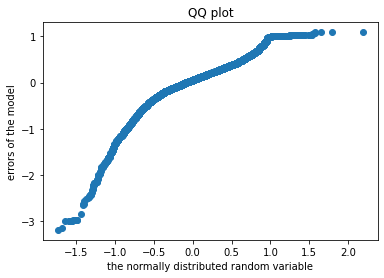

In [277]:
rand_nums = np.random.normal(np.mean(resid), np.std(resid), len(resid))
 
plt.scatter(np.sort(rand_nums), np.sort(resid))
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")
 
plt.show()

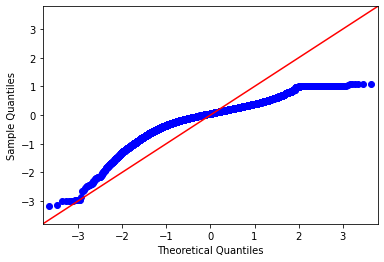

In [278]:
sm.qqplot(resid.values, line='45')
plt.show()



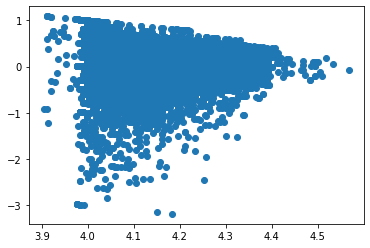

In [279]:
#answer below:
plt.scatter(predictions, resid)
plt.show()

Using the information above, try to select only the variables you think will lead to a better model and construct that model. Print out a summary

Plot the scatterplots between the independent variables you select and ratings. Do you think given these graphs, these variables have good predictive power? 

In [281]:
y = reviews_df['Rating']
X = reviews_df[['Reviews', 'Paid', 'Price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

qt = QuantileTransformer()
qt1 = qt.fit_transform(X_train)
# qt2 = qt.transform(X_test)
X_con = sm.add_constant(qt1)

results = sm.OLS(y_train, X_con).fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     150.0
Date:                Tue, 20 Oct 2020   Prob (F-statistic):           1.98e-94
Time:                        20:44:24   Log-Likelihood:                -5403.4
No. Observations:                7492   AIC:                         1.081e+04
Df Residuals:                    7488   BIC:                         1.084e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.9686      0.012    329.684      0.0

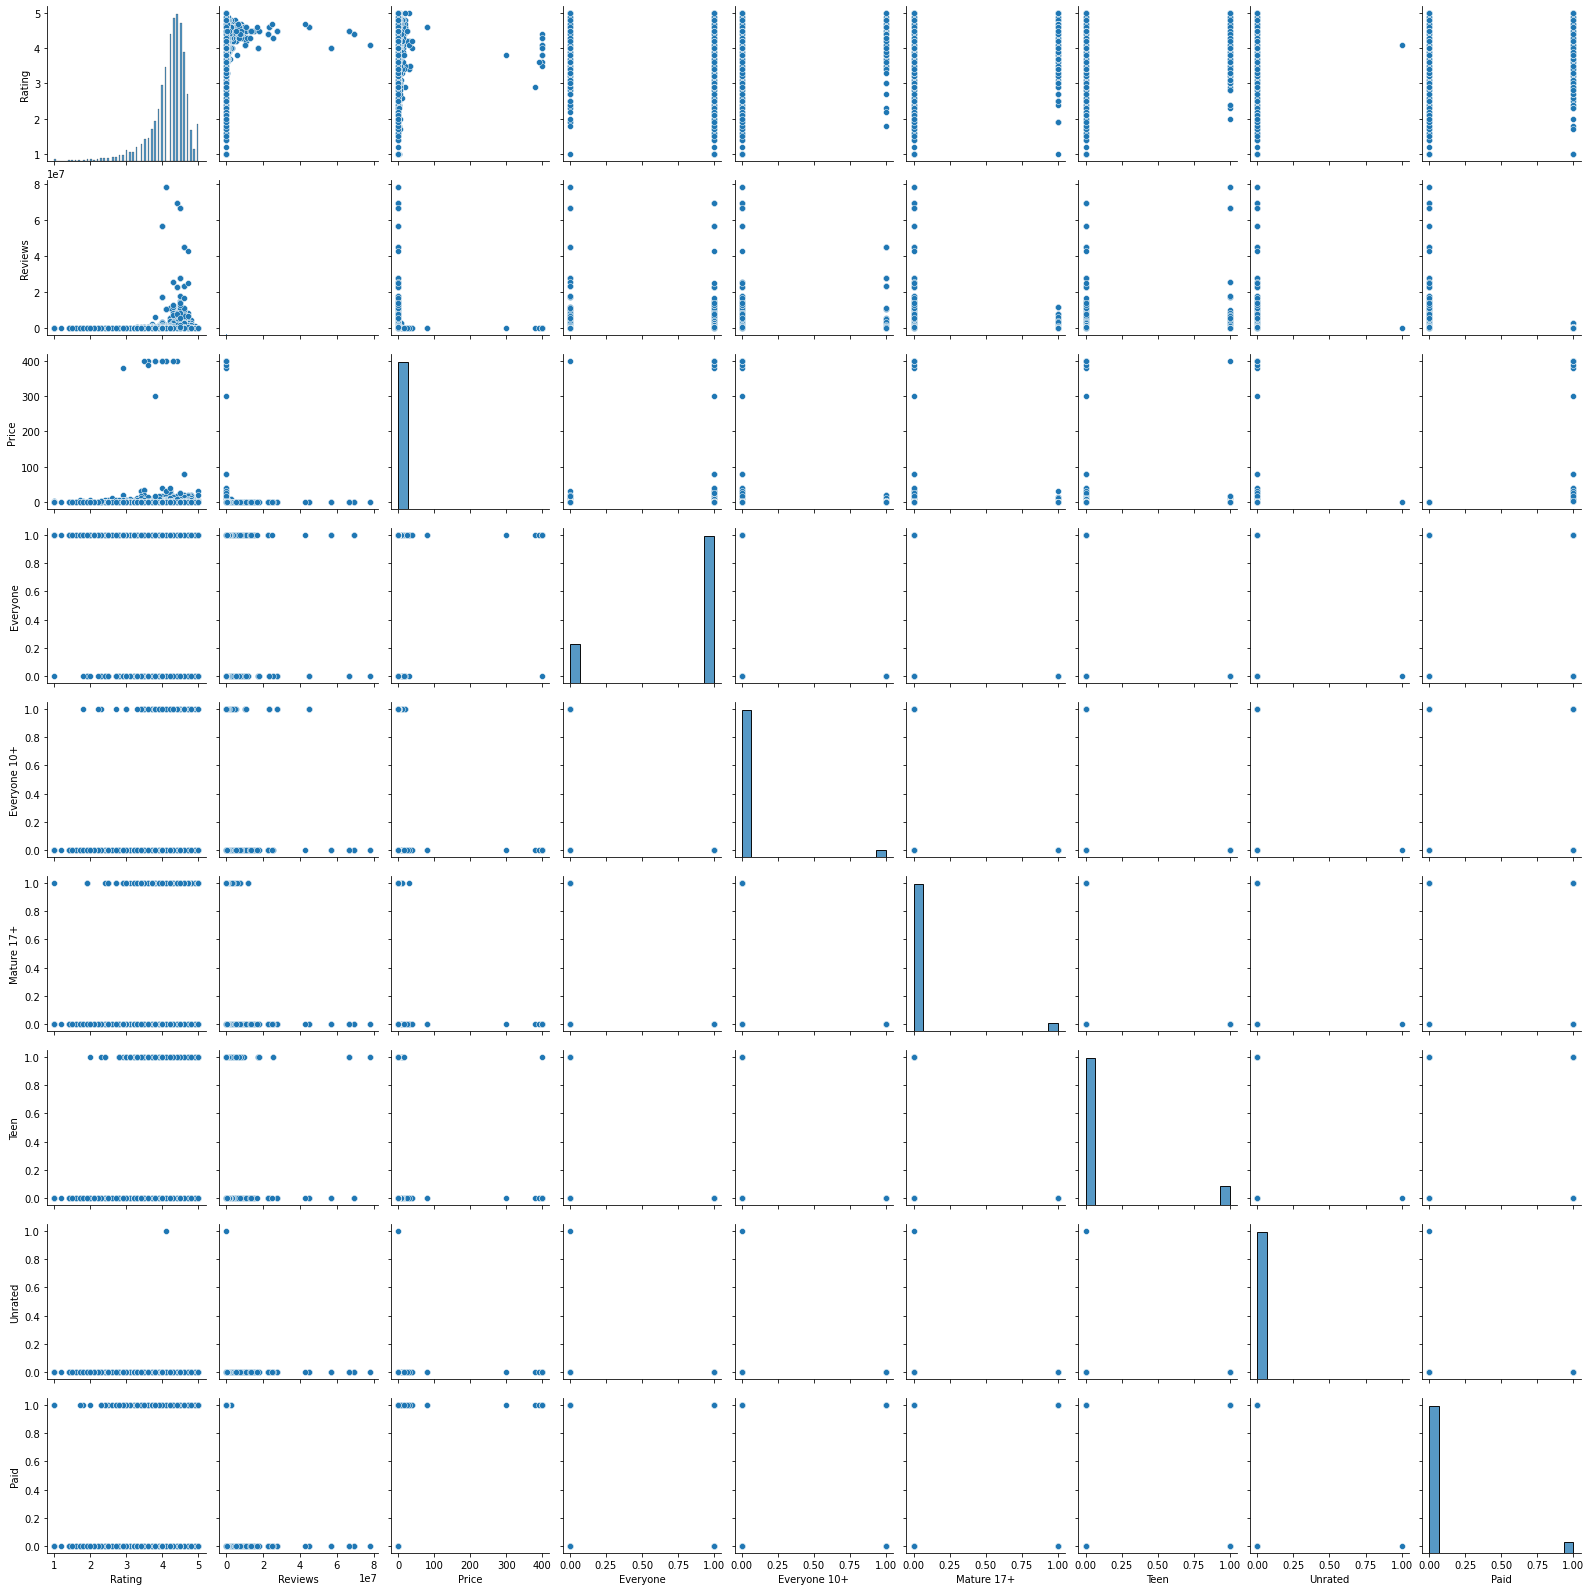

In [287]:
sns.pairplot(data=reviews_df)

What data processing could you do to improve this model? Experiment.